# milestone 1
# load datasets and EDA
# there are some main steps in EDA
## Load data and Understand structure
## handle missing value
## resample data
## Summary statistics
## Detect outliers
## Correlation analysis


# import library


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read file

In [4]:
df=pd.read_csv("air_quality_data.csv")
print(df.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


# inspect data know your data

In [5]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
City              0
Date              0
PM2.5          4598
PM10          11140
NO 

# visulaize data

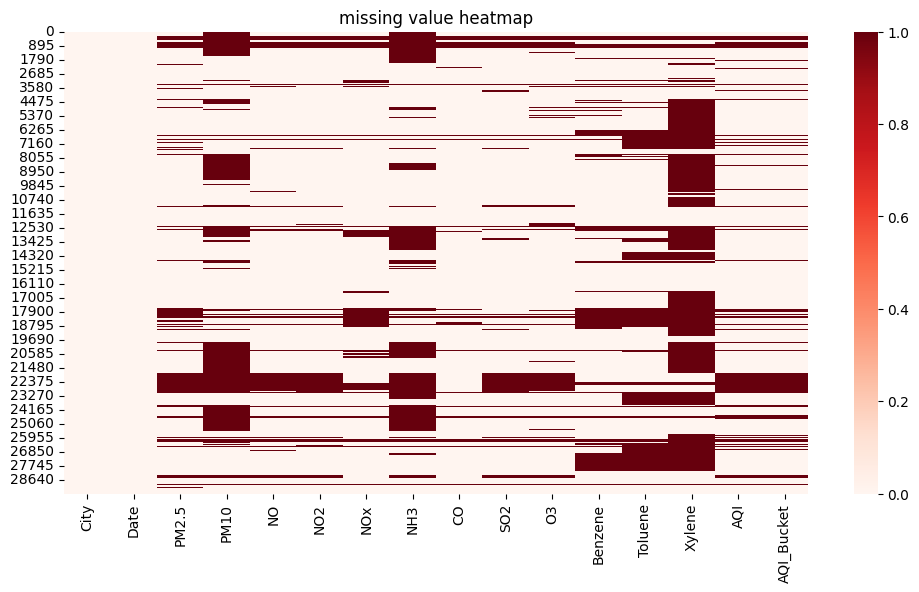

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap="Reds")
plt.title("missing value heatmap")
plt.show()

# handling missing value

In [8]:
CLEANED_FILE = "cleaned_air_quality.csv"      

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).sort_values("Date")

cols_to_fill = ['PM2.5','PM10','NO2','O3','SO2','CO','AQI','AQI_Bucket']

# --- Interpolation for each pollutant ---
for col in cols_to_fill:
    if col in df.columns:
        df[col] = df[col].interpolate(method='pad')
        df[col] = df[col].interpolate(method='bfill')

print("Shape after cleaning:", df.shape)
df.to_csv(CLEANED_FILE, index=False)
print(f"✔ Saved cleaned file → {CLEANED_FILE}")

C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\4278770276.py:11: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method='pad')
C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\4278770276.py:12: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method='bfill')


Shape after cleaning: (29531, 16)
✔ Saved cleaned file → cleaned_air_quality.csv


# Resampling hour wise data

In [16]:
HOURLY_FILE = "cleaned_air_quality_hourly.csv" 

city_hourly = []

for city, group in df.groupby("City"):
    group = group.set_index("Date").sort_index()

    # Hourly resampling
    hourly = group.resample("H").interpolate()
    hourly["City"] = city
    city_hourly.append(hourly)

df_hourly = (
        pd.concat(city_hourly)
        .reset_index()
        .sort_values(["City","Date"])
    )

# Final interpolation after hourly creation
for col in cols_to_fill:
    if col in df_hourly.columns:
        df_hourly[col] = df_hourly[col].interpolate(method='pad')
        df_hourly[col] = df_hourly[col].interpolate(method='bfill')

print("Shape after hourly resampling:", df_hourly.shape)


df_hourly.to_csv(HOURLY_FILE, index=False)
print(f" Saved cleaned hourly CSV → {HOURLY_FILE}")

df_hourly_cleaned=pd.read_csv("cleaned_air_quality_hourly.csv")
print(df_hourly_cleaned.head())

C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\2176037915.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = group.resample("H").interpolate()
C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\2176037915.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hourly = group.resample("H").interpolate()
C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\2176037915.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = group.resample("H").interpolate()
C:\Users\vsr\AppData\Local\Temp\ipykernel_13756\2176037915.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hourly = group.resample("H").interpolate()
C:\Users\vsr\AppData\Loc

Shape after hourly resampling: (708146, 16)
 Saved cleaned hourly CSV → cleaned_air_quality_hourly.csv
                  Date       City       PM2.5       PM10        NO        NO2  \
0  2015-01-01 00:00:00  Ahmedabad  313.220000  607.98000  0.920000  18.220000   
1  2015-01-01 01:00:00  Ahmedabad  307.926667  593.87875  0.922083  18.114583   
2  2015-01-01 02:00:00  Ahmedabad  302.633333  579.77750  0.924167  18.009167   
3  2015-01-01 03:00:00  Ahmedabad  297.340000  565.67625  0.926250  17.903750   
4  2015-01-01 04:00:00  Ahmedabad  292.046667  551.57500  0.928333  17.798333   

        NOx  NH3        CO       SO2        O3   Benzene   Toluene    Xylene  \
0  17.15000  NaN  0.920000  27.64000  133.3600  0.000000  0.020000  0.000000   
1  17.12125  NaN  0.922083  27.51125  129.2225  0.153333  0.248333  0.157083   
2  17.09250  NaN  0.924167  27.38250  125.0850  0.306667  0.476667  0.314167   
3  17.06375  NaN  0.926250  27.25375  120.9475  0.460000  0.705000  0.471250   
4  17.0350

# Descriptive Statistics

                                Date          PM2.5           PM10  \
count                         708146  708146.000000  708146.000000   
mean   2018-05-14 01:23:14.732725248      69.513764     125.991950   
min              2015-01-01 00:00:00       0.040000       0.010000   
25%              2017-04-15 22:15:00      30.259271      64.100000   
50%              2018-08-04 18:00:00      50.560000     103.455208   
75%              2019-09-02 13:00:00      84.012813     160.475000   
max              2020-07-01 00:00:00     949.990000    1000.000000   
std                              NaN      63.399555      88.670473   

                  NO            NO2            NOx            NH3  \
count  679850.000000  708146.000000  670657.000000  506761.000000   
mean       19.116966      28.612069      33.140283      24.336398   
min         0.020000       0.010000       0.000000       0.010000   
25%         5.938750      12.348750      13.684167       8.387708   
50%        10.152500    

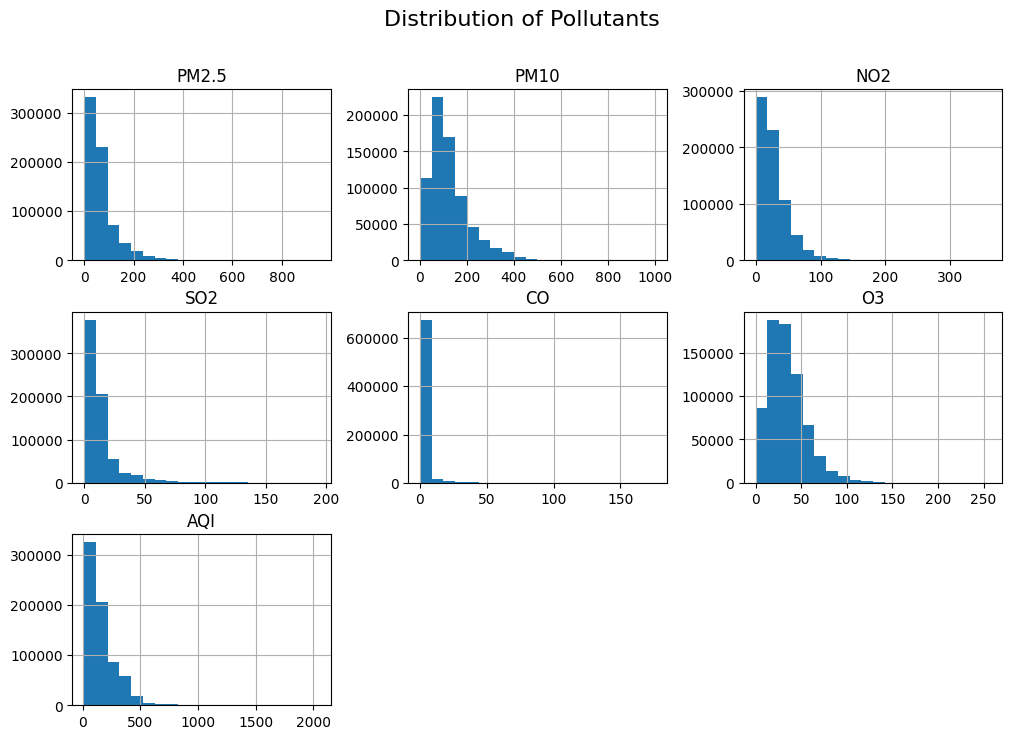

In [13]:
print(df_hourly.describe())
cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "AQI"]
df_hourly[cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Pollutants", fontsize=16)
plt.show()

#  Outlier Detection

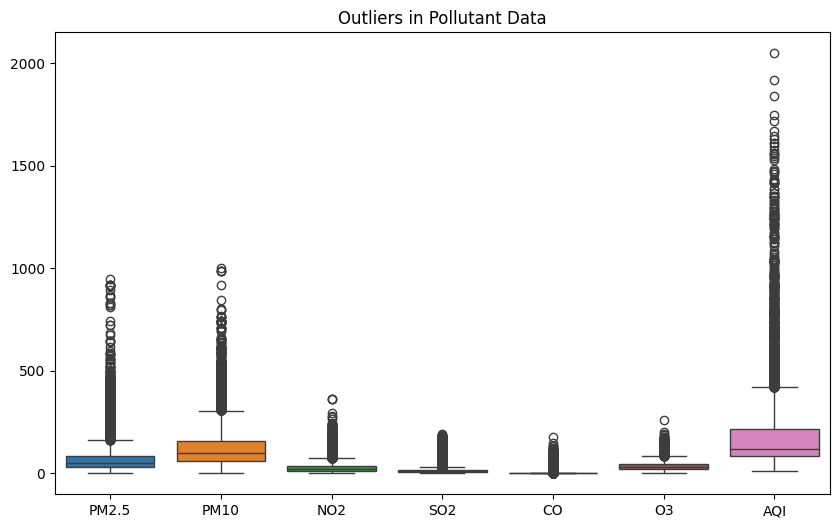

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[cols])
plt.title("Outliers in Pollutant Data")
plt.show()

# correlation analysis

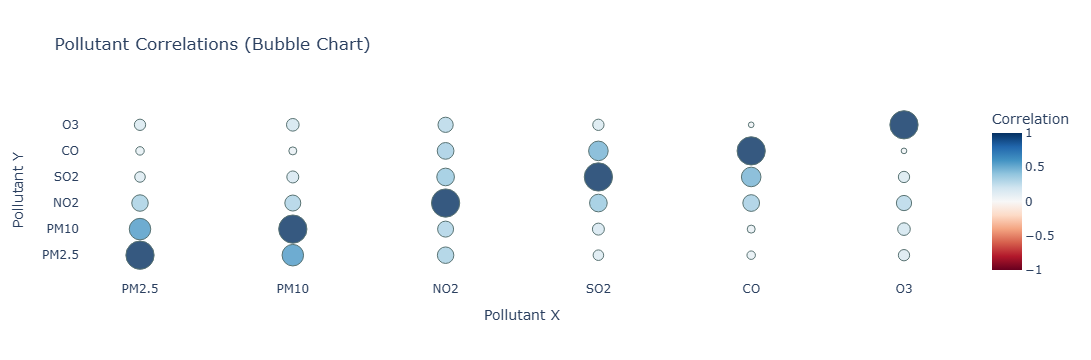

In [21]:
import plotly.express as px

pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
corr = df_hourly_cleaned[pollutant_cols].corr().round(2)
corr_long = corr.stack().reset_index()
corr_long.columns = ['Pollutant_X', 'Pollutant_Y', 'Correlation']


fig = px.scatter(
    corr_long,
    x='Pollutant_X',
    y='Pollutant_Y',
    size=corr_long['Correlation'].abs() * 30,  # bubble size based on abs correlation
    color='Correlation',
    color_continuous_scale='RdBu',
    range_color=[-1, 1],
    hover_data={'Correlation': True},
    title='Pollutant Correlations (Bubble Chart)',
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Pollutant X',
    yaxis_title='Pollutant Y',
    plot_bgcolor='white',
    font=dict(size=12),
)
fig.show()